In [372]:
import pandas as pd
import pickle as pk
import sys
import numpy as np
import pdb

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 1000

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

# Understanding the Dataset

Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

### Data Exploration

In [373]:
## Load dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pk.load(data_file)
    
my_dataset = data_dict
features_list = ['poi','salary']

#data = featureFormat(my_dataset, features_list, sort_keys = True)

In [374]:
## Load the data dictionary into a dataframe
data = pd.DataFrame.from_dict(my_dataset,orient='index')
data.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,13868,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,56301,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,11200,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,129142,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [375]:
## Total Number of Data Points
data.size

3066

In [376]:
## Number of Available Features
len(data.columns)

21

In [377]:
## Available Features
sorted(list(data.columns))

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [378]:
data.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,13868,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,56301,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,11200,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,129142,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [379]:
## Allocation across classes (POI/non-POI)
data['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

In [380]:
## Features with missing values
data = data.replace('NaN',np.nan)
data.isnull().sum().sort_values(ascending = False)

loan_advances                142
director_fees                129
restricted_stock_deferred    128
deferral_payments            107
deferred_income               97
long_term_incentive           80
bonus                         64
from_poi_to_this_person       60
shared_receipt_with_poi       60
to_messages                   60
from_this_person_to_poi       60
from_messages                 60
other                         53
expenses                      51
salary                        51
exercised_stock_options       44
restricted_stock              36
email_address                 35
total_payments                21
total_stock_value             20
poi                            0
dtype: int64

In [381]:
data = data.replace(np.nan,0.0)

In [382]:
data.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,13868.0,0.0,2195.0,152.0,65.0,False,0.0,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,0.0,0.0,178980.0,182466.0,257817.0,0.0,0.0,0.0,0.0,257817.0,3486.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0,0.0
BANNANTINE JAMES M,477.0,566.0,0.0,916197.0,4046157.0,0.0,1757552.0,465.0,-560222.0,5243487.0,56301.0,0.0,29.0,864523.0,0.0,False,0.0,-5104.0,0.0,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,10623258.0,11200.0,0.0,0.0,2660303.0,0.0,False,0.0,-1386055.0,1586055.0,0,0.0
BAY FRANKLIN R,239671.0,0.0,260455.0,827696.0,0.0,400000.0,145796.0,0.0,-82782.0,63014.0,129142.0,0.0,0.0,69.0,0.0,False,0.0,-201641.0,0.0,frank.bay@enron.com,0.0


### Outliers

In [383]:
## Removing the 'TOTAL' row
data[data['salary'] == data['salary'].max()]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
TOTAL,26704229.0,0.0,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,0.0,-7576788.0,434509511.0,5235198.0,83925000.0,0.0,42667589.0,0.0,False,1398517.0,-27992891.0,48521928.0,0,0.0


In [384]:
data = data.drop('TOTAL')

In [385]:
data[fin_columns].describe()

,salary,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,total_stock_value,expenses,deferred_income,long_term_incentive
count,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,145.000000,1.450000e+02,1.450000e+02
mean,1.841671e+05,2.205579e+05,2.243477e+06,2.061486e+06,6.713353e+05,8.625464e+05,7.291157e+04,2.889718e+06,35131.372414,-1.923475e+05,3.346340e+05
std,1.969598e+05,7.517046e+05,8.817819e+06,4.781941e+06,1.230148e+06,2.010852e+06,1.297469e+06,6.172223e+06,45247.175705,6.041174e+05,6.853639e+05
min,0.000000e+00,-1.025000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-1.787380e+06,-4.409300e+04,0.000000,-3.504386e+06,0.000000e+00
25%,0.000000e+00,0.000000e+00,9.109300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.211410e+05,0.000000,-3.666600e+04,0.000000e+00
50%,2.105000e+05,0.000000e+00,9.161970e+05,6.078370e+05,3.000000e+05,3.605280e+05,0.000000e+00,9.558730e+05,18834.000000,0.000000e+00,0.000000e+00
75%,2.690760e+05,7.961000e+03,1.934359e+06,1.668260e+06,8.000000e+05,6.989200e+05,0.000000e+00,2.282768e+06,53122.000000,0.000000e+00,3.743470e+05
max,1.111258e+06,6.426990e+06,1.035598e+08,3.434838e+07,8.000000e+06,1.476169e+07,1.545629e+07,4.911008e+07,228763.000000,0.000000e+00,5.145434e+06


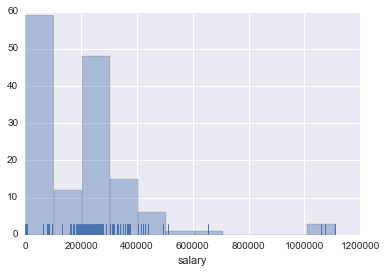

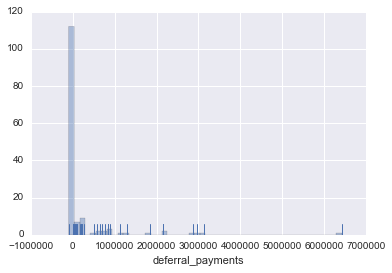

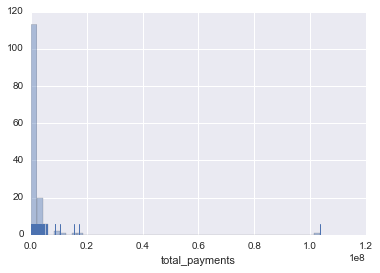

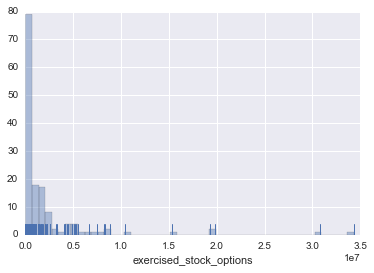

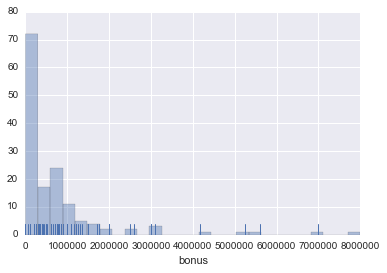

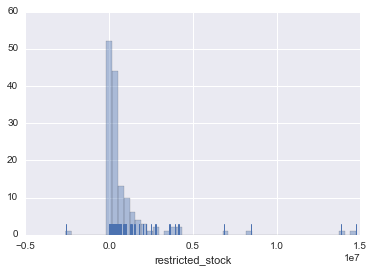

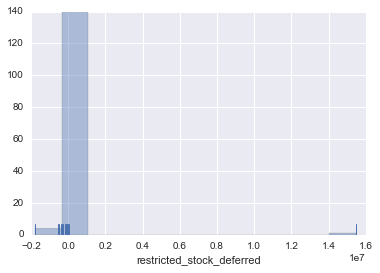

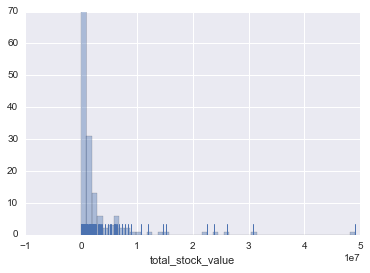

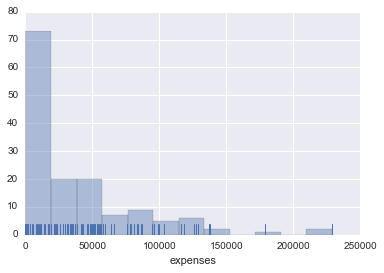

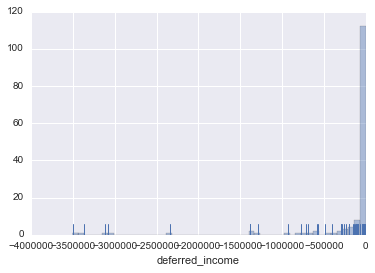

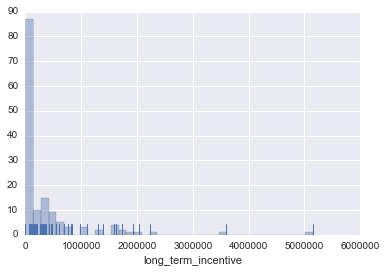

In [386]:
for idx,col in enumerate(fin_columns):
    sns.distplot(data[col].dropna(), kde=False, rug=True);
    plt.show()
    plt.close()

In [387]:
data[data['restricted_stock_deferred'] == data['restricted_stock_deferred'].max()]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BHATNAGAR SANJAY,0.0,523.0,0.0,15456290.0,2604490.0,0.0,-2604490.0,463.0,15456290.0,0.0,0.0,0.0,29.0,137864.0,1.0,False,137864.0,0.0,0.0,sanjay.bhatnagar@enron.com,0.0


In [388]:
fin_columns = ['salary','deferral_payments','total_payments','exercised_stock_options','bonus','restricted_stock','restricted_stock_deferred','total_stock_value','expenses','deferred_income','long_term_incentive']

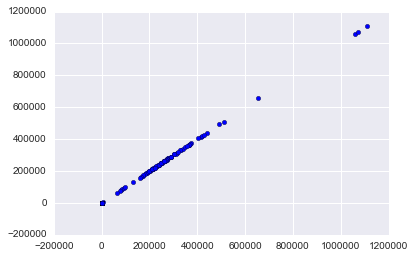

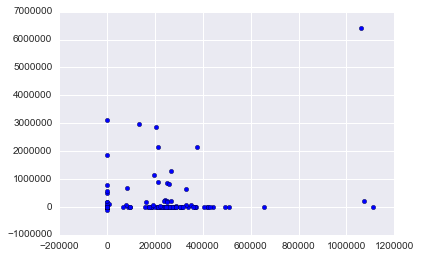

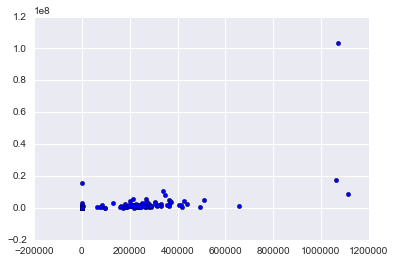

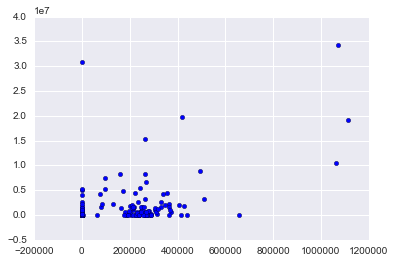

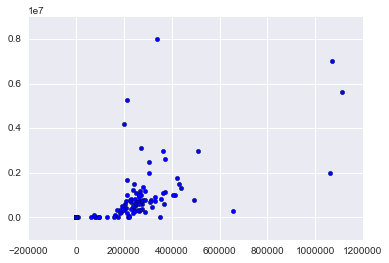

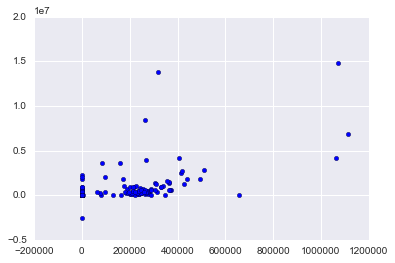

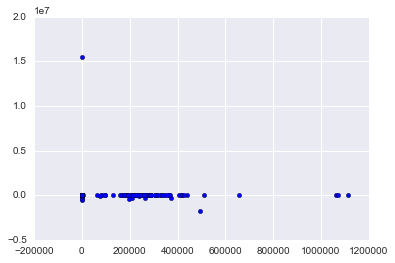

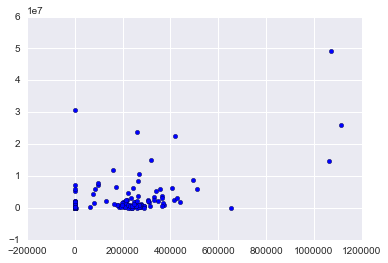

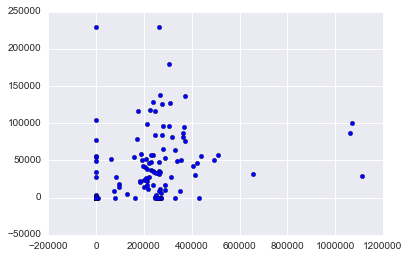

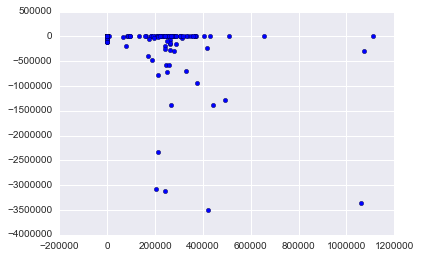

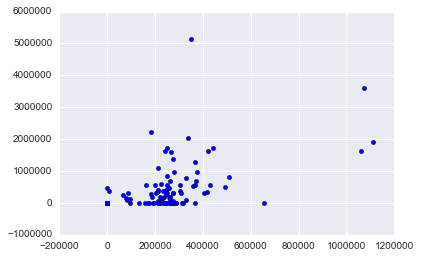

In [389]:
for col in fin_columns:
    plt.scatter(data[fin_columns]['salary'],data[fin_columns][col])
    plt.show()
    plt.close()

In [390]:
#data['poi_int'] = data['poi'].replace(False,0).replace(True,1)

In [391]:
test = data[data.salary.notnull()]

In [392]:
len(test.poi)

145

In [393]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

salary       = np.reshape( np.array(test.salary), (len(test.salary), 1))
poi = np.reshape( np.array(test.poi), (len(test.poi), 1))

reg = LinearRegression()
reg.fit(salary, poi)

pred = reg.predict(salary)

In [394]:
def outlierCleaner(preds, feature_vals):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where
        each tuple is of the form (age, net_worth, error).
    """

    cleaned_data = []

    diffs = (np.array(feature_vals) - np.array(preds)) ** 2

    data = zip(feature_vals, diffs)
#     import pdb
#     pdb.set_trace()

    cleaned_data = sorted(data, key=lambda tup: tup[1])[0:85]

    return cleaned_data

In [395]:
cleaned_data = outlierCleaner(pred,salary)

In [396]:
#from feature_format import featureFormat, targetFeatureSplit

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where
        each tuple is of the form (age, net_worth, error).
    """

    cleaned_data = []

    diffs = (np.array(net_worths) - np.array(predictions)) ** 2

    data = zip(ages, net_worths, diffs)

    cleaned_data = sorted(data, key=lambda tup: tup[2])[0:81]

    return cleaned_data

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train,net_worths_train)

pred = reg.predict(ages_train)

cleaned_data = outlierCleaner(pred,ages_train,net_worths_train)

clean_ages = [tup[0] for tup in cleaned_data]
clean_net_worths = [tup[1] for tup in cleaned_data]

#reg.fit(clean_ages, clean_net_worths)

NameError: name 'ages_train' is not defined

# Optimize Feature Selection/Engineering

What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]

### Create new features 

In [ ]:
### Use PCA to create a new features of financial features?

### Intelligently select features 

In [397]:
data.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,13868.0,0.0,2195.0,152.0,65.0,False,0.0,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,0.0,0.0,178980.0,182466.0,257817.0,0.0,0.0,0.0,0.0,257817.0,3486.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0,0.0
BANNANTINE JAMES M,477.0,566.0,0.0,916197.0,4046157.0,0.0,1757552.0,465.0,-560222.0,5243487.0,56301.0,0.0,29.0,864523.0,0.0,False,0.0,-5104.0,0.0,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,10623258.0,11200.0,0.0,0.0,2660303.0,0.0,False,0.0,-1386055.0,1586055.0,0,0.0
BAY FRANKLIN R,239671.0,0.0,260455.0,827696.0,0.0,400000.0,145796.0,0.0,-82782.0,63014.0,129142.0,0.0,0.0,69.0,0.0,False,0.0,-201641.0,0.0,frank.bay@enron.com,0.0


In [398]:
rel_cols = ['bonus','deferral_payments',
'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [399]:
data.fillna(0.0).as_matrix(columns=fin_columns)

array([[  2.01955000e+05,   2.86971700e+06,   4.48444200e+06, ...,
          1.38680000e+04,  -3.08105500e+06,   3.04805000e+05],
       [  0.00000000e+00,   1.78980000e+05,   1.82466000e+05, ...,
          3.48600000e+03,   0.00000000e+00,   0.00000000e+00],
       [  4.77000000e+02,   0.00000000e+00,   9.16197000e+05, ...,
          5.63010000e+04,  -5.10400000e+03,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.58403000e+05,   0.00000000e+00,   3.60300000e+05, ...,
          5.39470000e+04,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   5.50970000e+04, ...,
          5.50970000e+04,   0.00000000e+00,   0.00000000e+00]])

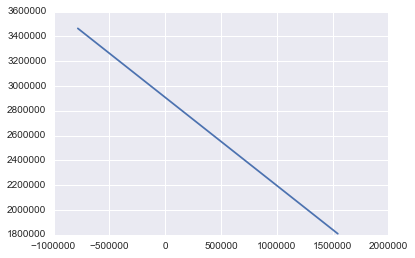

In [400]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data[rel_cols])
test = pca.transform(data[rel_cols])
plt.plot(test[0],test[1])

In [422]:
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif,percentile = 15)
selector.fit(data[rel_cols],data['poi'])
features_transformed = selector.transform(data[rel_cols])

In [423]:
import sklearn.linear_model.Lasso

reg = Lasso()
reg.fit()

ImportError: No module named Lasso

### Properly scale features 

In [424]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rescaled_weight = scaler.fit_transform(features_transformed)

# Pick and Tune an Algorithm

### Pick an algorithm

What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

In [425]:
from sklearn import cross_validation

features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(rescaled_weight,data['poi'], test_size=0.2, random_state=42)

In [490]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)

clf.score(features_test,labels_test)

0.7931034482758621

In [428]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(features_train,labels_train)

clf.score(features_test,labels_test)

0.93103448275862066

In [487]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(features_train,labels_train)

clf.score(features_test,labels_test)

0.89655172413793105

In [483]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(features_train,labels_train)

clf.score(features_test,labels_test)

0.89655172413793105

In [486]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features_train,labels_train)

clf.score(features_test,labels_test)

0.86206896551724133

In [484]:
from sklearn.ensemble import AdaBoostClassifier#, SAMME

clf = AdaBoostClassifier(base_estimator=GaussianNB(),algorithm='SAMME',learning_rate=0.1, n_estimators=20)
clf.fit(features_train,labels_train)

clf.score(features_test,labels_test)

0.89655172413793105

In [489]:
from sklearn.grid_search import GridSearchCV

param_grid = {
         'base_estimator': [DecisionTreeClassifier(),GaussianNB(),SVC()],
         'n_estimators': [10,20,50,100,250,500],
          'learning_rate': [0.1,0.5,1],
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(AdaBoostClassifier(algorithm='SAMME'), param_grid)
clf = clf.fit(rescaled_weight,data['poi'])

print "Best estimator found by grid search:"
print clf.best_estimator_

Best estimator found by grid search:
AdaBoostClassifier(algorithm='SAMME', base_estimator=GaussianNB(),
          learning_rate=0.1, n_estimators=20, random_state=None)


In [494]:
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(), param_grid)
clf = clf.fit(rescaled_weight,data['poi'])

print "Best estimator found by grid search:"
print clf.best_estimator_

Best estimator found by grid search:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Parameter tuning

What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]

### Tune the algorithm

# Validate and Evaluate

### Usage of Evaluation Metrics

Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

In [475]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(rescaled_weight,data['poi'], test_size=0.20, random_state=42)

clf = AdaBoostClassifier(base_estimator=GaussianNB(),algorithm='SAMME',learning_rate=0.1, n_estimators=20)#GaussianNB()
clf.fit(X_train,y_train)

y_guess = clf.predict(X_test)


from sklearn import metrics
print metrics.precision_score(y_test,y_guess)
print metrics.recall_score(y_test,y_guess)
print metrics.f1_score(y_test,y_guess)

0.5
0.333333333333
0.4


In [476]:
output = pd.DataFrame(y_test)
output['guess'] = y_guess

In [477]:
# TRUE POSITIVES
y_orig[(output.poi) & (output.guess)]

,poi_int,guess
RICE KENNETH D,True,True


In [478]:
# FALSE NEGATIVES
output[(output.poi == True) & (output.guess == False)]

,poi,guess
DELAINEY DAVID W,True,False
KOENIG MARK E,True,False


In [479]:
# FALSE POSITIVES
y_orig[(output.poi == False) & (output.guess == True)]

,poi_int,guess
LAVORATO JOHN J,False,True


In [480]:
data.loc[['KOENIG MARK E','RICE KENNETH D','DELAINEY DAVID W'],:]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
KOENIG MARK E,309946.0,2374.0,0.0,1587421.0,671737.0,700000.0,1248318.0,2271.0,0.0,1920055.0,127017.0,0.0,61.0,150458.0,15.0,True,0.0,0.0,300000.0,mark.koenig@enron.com,53.0
RICE KENNETH D,420636.0,905.0,0.0,505050.0,19794175.0,1750000.0,2748364.0,864.0,0.0,22542539.0,46950.0,0.0,18.0,174839.0,4.0,True,0.0,-3504386.0,1617011.0,ken.rice@enron.com,42.0
DELAINEY DAVID W,365163.0,3093.0,0.0,4747979.0,2291113.0,3000000.0,1323148.0,2097.0,0.0,3614261.0,86174.0,0.0,3069.0,1661.0,609.0,True,0.0,0.0,1294981.0,david.delainey@enron.com,66.0


### Validation Strategy

What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]

### Algorithm Performance